# Предобработка изображений

In [3]:
# Импортируем необходимые библиотеки

import numpy as np
from skimage.io import imread, imsave
from matplotlib import pyplot as plt

from platform import python_version

%matplotlib inline

(9773, 3809)

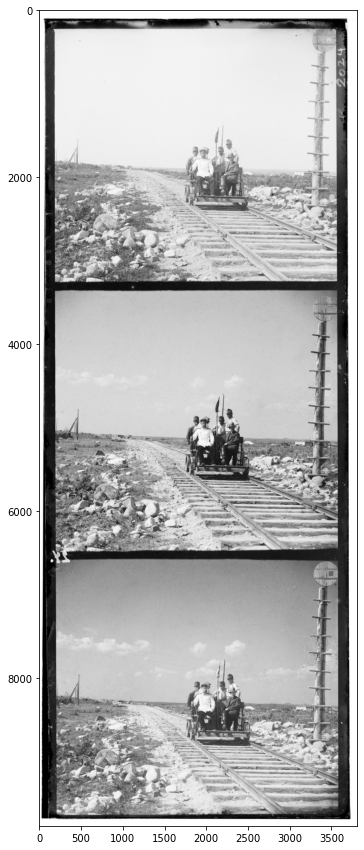

In [125]:
# Загружаем изображение

image = imread('public_tests/10_test_img_input/img.png')

plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')
image.shape

In [127]:
# Разделяем изображения на 3 канала

img_b = image[:round(len(image) / 3) - 1]
img_g = image[round(len(image) / 3): 2 * (round(len(image) / 3)) - 1]
img_r = image[2 * (round(len(image) / 3)):]

images = [img_b, img_g, img_r]
img_b.shape, img_g.shape, img_r.shape

((3257, 3809), (3257, 3809), (3257, 3809))

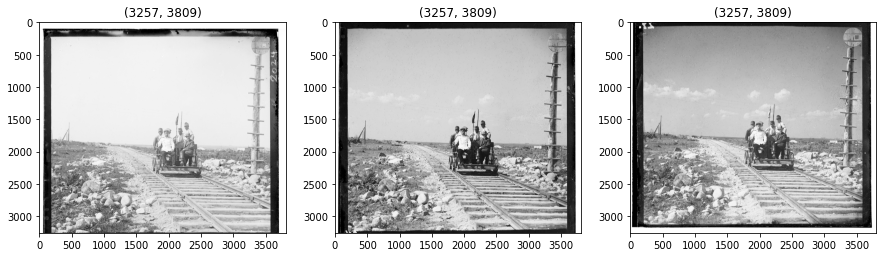

In [128]:
# Рисуем 

plt.figure(figsize=(15, 5))
for idx, img in enumerate(images):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(img.shape)

In [129]:
# Найдем размеры рамок

h_10 = round(len(img_b) * 0.1)
w_10 = round(len(img_b[0]) * 0.1)
h_10, w_10
#plt.imshow(img_b[:400, :500], cmap='gray')

(326, 381)

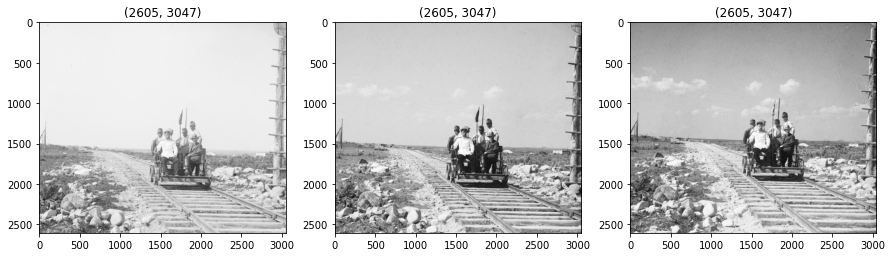

In [130]:
# Удаляем рамку и выводим готовые изображения без рамок

plt.figure(figsize=(15, 5))
for idx, img in enumerate(images):
    images[idx] = img[h_10:-h_10, w_10:-w_10]
    plt.subplot(1, 3, idx + 1)
    plt.imshow(images[idx], cmap='gray')
    plt.title(images[idx].shape)

#  Базовое совмещение

In [136]:
for i, img in enumerate(images):
    print(i, img)

(h, x) = images[0].shape

0 [[229 229 229 ... 192 186 186]
 [231 231 231 ... 193 188 182]
 [228 229 232 ... 196 191 186]
 ...
 [ 91 108 117 ... 181 181 181]
 [ 91 104 113 ... 185 187 184]
 [ 86  97 104 ... 187 192 192]]
1 [[182 186 186 ... 161 160 151]
 [187 186 185 ... 156 155 149]
 [186 186 186 ... 153 152 147]
 ...
 [142 150 157 ...  83  85  83]
 [152 156 153 ...  85  89  89]
 [160 155 150 ...  80  85  87]]
2 [[144 145 147 ... 150 152 154]
 [144 145 144 ... 150 150 150]
 [142 144 145 ... 143 148 150]
 ...
 [132 132 132 ...  93  97  92]
 [124 127 126 ...  94  95  97]
 [128 129 124 ...  92  94  94]]


In [153]:
a = [[], [], []]
a[0].append([1,2,4])

In [154]:
a[0].append([5, 6, 7])
a[1].append([5, 6, 7])

a[0]

[[[1, 2, 4], [5, 6, 7]], [[5, 6, 7]], []]

In [157]:
a[0][-1]

[5, 6, 7]

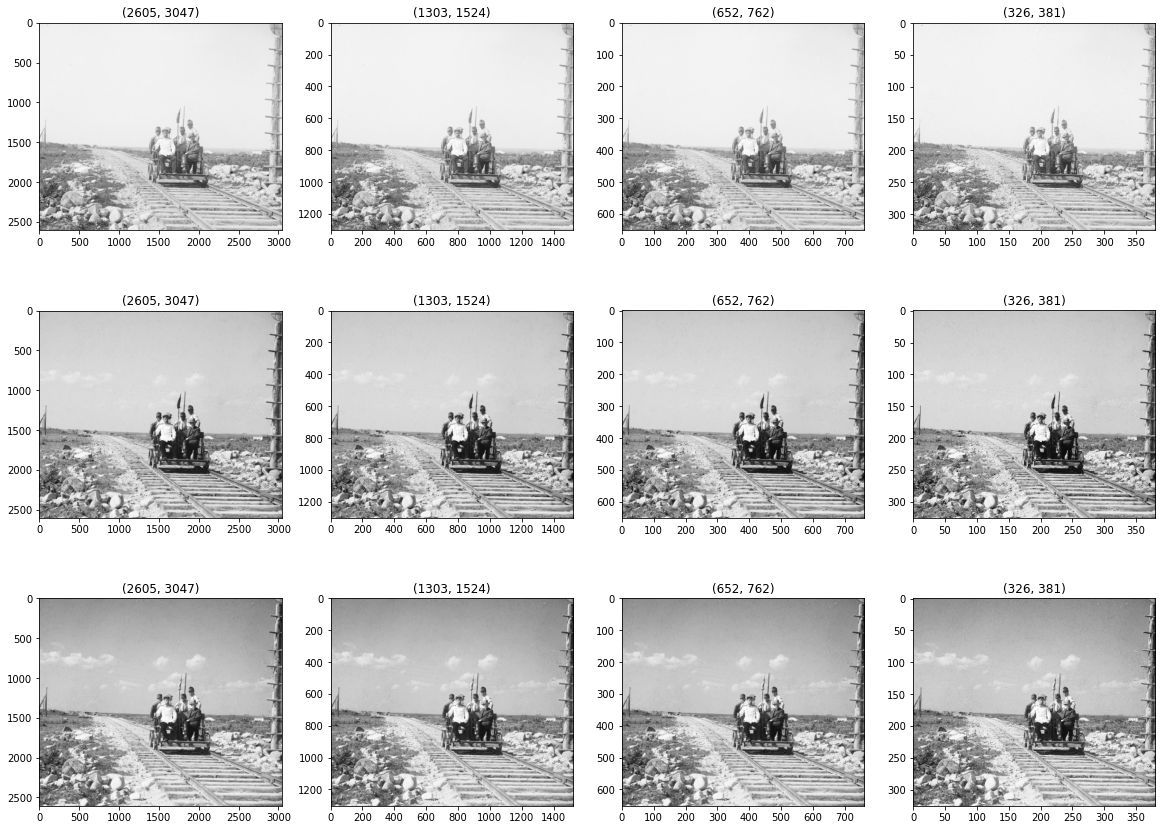

In [176]:
plt.figure(figsize=(20, 15))

k = 0
img_sizes = [[], [], []]    # список, хранящий все картинки (да, не очень хорошо, но иначе будет много циклов)

for i,img in enumerate(images):
    deg2 = 1
    (h, x) = img.shape
    while h > 500 or x > 500:
        # рисуем
        plt.subplot(3, 4, k + 1)
        plt.imshow(img[::deg2, ::deg2], cmap='gray')
        plt.title(img[::deg2, ::deg2].shape)
        
        # пополняем список
        img_sizes[i].append(img[::deg2, ::deg2])
        
        # изменяем параметры для следующего шага цикла
        (h, x) = img[::deg2, ::deg2].shape
        deg2 *= 2
        k += 1

In [171]:
img_sizes = np.array(img_sizes)

In [205]:
img_sizes[0][3][1, 2]

232

In [207]:
np.sum((img_sizes[0][3][1:] - img_sizes[1][3][:-1])*
       (img_sizes[0][3][1:] - img_sizes[1][3][-1]))

15574591

In [169]:
img_sizes[1][3]

array([[182, 185, 181, ..., 153, 141, 151],
       [186, 182, 188, ..., 148, 140, 152],
       [186, 188, 188, ..., 143, 142, 155],
       ...,
       [ 81,  90, 136, ..., 148, 136, 137],
       [ 83, 117, 117, ..., 103,  91,  89],
       [113, 127, 161, ...,  88,  85,  78]], dtype=uint8)

In [247]:
len(img_sizes[0])

4

In [220]:
disp_min_mse = {0:3, 0:2, 2:0, 0:1}

In [251]:
m = []
m.append([])
m.append([])
m

[[], []]

In [254]:
img_sizes[1][1][]

array([[182, 186, 181, ..., 155, 161, 151],
       [186, 186, 185, ..., 156, 153, 147],
       [182, 185, 181, ..., 155, 156, 150],
       ...,
       [113, 142, 163, ...,  80,  83,  84],
       [142, 157, 154, ...,  80,  83,  83],
       [160, 150, 137, ...,  74,  80,  87]], dtype=uint8)

In [236]:
min_mse = []
min_disp = []
mse = 0

for j in range(inv(len(img_sizes[0])):
    min_mse.append([])
    min_disp.append([])
    
    for i in range(3):
        if i != 2: #сравниваем пары картинок 1-2 и 2-3
            min_mse.append(np.sum((img_sizes[0][j] - img_sizes[1][j])**2))
            min_disp.append(0)

            for disp in range(-2,2):
                if disp > 0:
                    mse = np.sum((img_sizes[i][j][disp:] - img_sizes[i+1][j][:-disp])**2)
                elif disp < 0:
                    mse = np.sum((img_sizes[i][j][:-disp] - img_sizes[i+1][j][disp:])**2)
                else: 
                    mse = np.sum((img_sizes[i][j] - img_sizes[i+1][j])**2)

                if mse < min_mse[i]:
                    min_mse[i] = mse
                    min_disp[i] = disp


        else: # сравнимаем пару картинок 1-3
            min_mse.append(np.sum((img_sizes[i][j] - img_sizes[0][j])**2))
            min_disp.append(0)

            for disp in range(-2,2):
                if disp > 0:
                    mse = np.sum((img_sizes[i][j][disp:] - img_sizes[0][j][:-disp])**2)
                elif disp < 0:
                    mse = np.sum((img_sizes[i][j][:-disp] - img_sizes[0][j][disp:])**2)
                else: 
                    mse = np.sum((img_sizes[i][j] - img_sizes[0][j])**2)

                if mse < min_mse[i]:
                    min_mse[i] = mse
                    min_disp[i] = disp

min_mse, min_disp

([41156, 42350, 37440], [-1, -1, -1])